In [3]:
import os
import numpy as np
import matplotlib as mpl
#import pandas as pd,
import itertools
import matplotlib.pyplot as plt
from spike_stats import *

Text(0.5, 23.52222222222222, 'DC fine value')

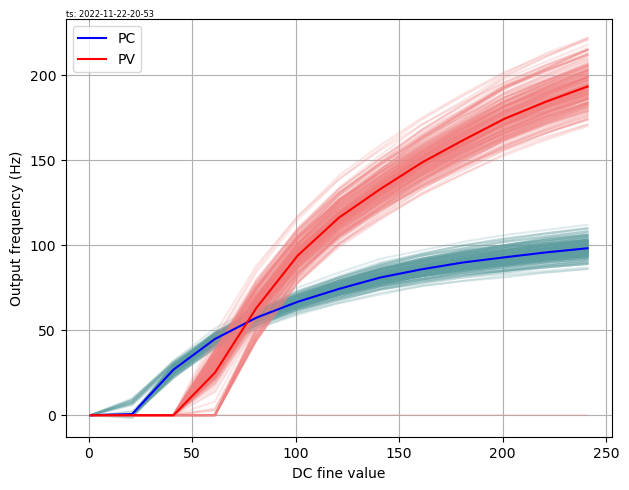

In [5]:
#Load Data 
board_names=["dev_board"]
date_label ="2022-11-22"
tname = "FI Single Neurons"
time_label = "20-53"
dir_path = f"./data/{tname}/{date_label}"
config_path = f"{dir_path}/config"
ff_output=np.load(f"{dir_path}/ff_{time_label}.npy",allow_pickle=True)

nvn=1
pvn=10
pcn=80
sstn=0
in_freq=700

FF_in=ff_output[0]
FF_out_PC=ff_output[1]
FF_out_PV=ff_output[2]
FF_out_SST=ff_output[3]
FF_cv=ff_output[4]


if sum((sstn==0,pvn==0,pcn==0))>0:
    for i in range(len(FF_out_SST)):
        plt.plot(FF_in,FF_out_SST[i],c='sandybrown',alpha=0.2)
    for i in range(len(FF_out_PC)):
        plt.plot(FF_in,FF_out_PC[i],c='cadetblue',alpha=0.2)
    for i in range(len(FF_out_PV)):
        plt.plot(FF_in,FF_out_PV[i],c='lightcoral',alpha=0.2)
if pcn>0:
    mean_PC=np.mean(FF_out_PC,axis=0)
    std_PC=np.std(FF_out_PC,axis=0)
    plt.plot(FF_in,mean_PC,c='b',label='PC')
    plt.fill_between(FF_in, mean_PC - std_PC, mean_PC + std_PC,color='cadetblue', alpha=0.3)
if pvn>0:
    mean_PV=np.mean(FF_out_PV,axis=0)
    std_PV=np.std(FF_out_PV,axis=0)
    plt.plot(FF_in,mean_PV,c='r',label='PV')
    plt.fill_between(FF_in, mean_PV - std_PV, mean_PV + std_PV,color='lightcoral', alpha=0.2)
if sstn>0:
    mean_SST=np.mean(FF_out_SST,axis=0)
    std_SST=np.std(FF_out_SST,axis=0)
    plt.plot(FF_in,mean_SST,c='orange',label='SST')
    plt.fill_between(FF_in, mean_SST - std_SST, mean_SST + std_SST,color='sandybrown', alpha=0.2)
annotation_string = f"ts: {date_label}-{time_label}"
plt.text(0,1.023, annotation_string,transform=plt.gca().transAxes, va = "top", ha="left",fontsize=6)
plt.ylabel('Output frequency (Hz)')
plt.grid(True)
plt.tight_layout()
plt.legend()        
plt.xlabel('DC fine value')

  